#### 1. Loading Libraries and Data


##### a. Load Libraries

In [29]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
# Other Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

#### b. Load the data

In [30]:
# Load Data
# initial directory
cwd = os.getcwd()
os.chdir('E:\Data Science\Project')
startTimeScript = datetime.now()
inputFile = 'Credit_Card.csv'
entireDataset = read_csv(inputFile, na_values="na")
inputFile = 'Credit_Card.csv'
testDataset = read_csv(inputFile, na_values="na")
#default payment next month

## Data Description and Summarization

#### Dimensions of the dataset


In [31]:
print("Number of Rows and Columns in Train Data:", entireDataset.shape)
print("Number of Rows and Columns in Test Data:", testDataset.shape)

Number of Rows and Columns in Train Data: (30000, 25)
Number of Rows and Columns in Test Data: (30000, 25)


#### Check Y variable proportion in Training Data (In percentage)

In [32]:
# Y variable proportion in Training Data (In percentage)
print(entireDataset.groupby('default payment next month').size())
print('''******************************''')
print(entireDataset["default payment next month"].value_counts()/len(entireDataset["default payment next month"]))

default payment next month
0    23364
1     6636
dtype: int64
******************************
0    0.7788
1    0.2212
Name: default payment next month, dtype: float64


### Observation
#### A number of 6,636 out of 30,000 (or 22%) of clients will default next month.

In [33]:
# 3. Variables Data Types
entireDataset.info() # In this we can check Null Values also
# Or you can use
# print(entireDataset.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CID                         30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Data Glimpse

In [9]:
# We start by looking to the data features (first 5 rows).

In [34]:
entireDataset.head()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [35]:
# Look into more details
entireDataset.describe()

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Observations

1. No of records are 30000
2. The average value for credit card limit is 167484, and std dev is 129747 which is unusual(Might be due to outliers, we can see Max limit is 1 Million)
3. Average age of customers is 35 yrs, where Std dev is 9 which is usual only.
4. Default payment next month: 
Not Default = 0
Default = 1


### Check Missing data

In [36]:
# Check for missing data

total = entireDataset.isnull().sum().sort_values(ascending = False)
percent = (entireDataset.isnull().sum()/entireDataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,default payment next month,PAY_6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,CID
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Observation:
##### There is no missing data

### Data Analysis/ Exploration

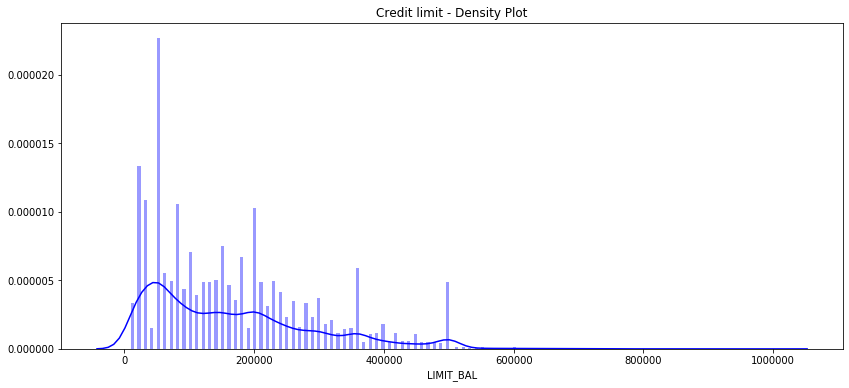

In [37]:
## Credit Limit feature

plt.figure(figsize = (14,6))
plt.title('Credit limit - Density Plot')
sns.set_color_codes("dark")
sns.distplot(entireDataset['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [38]:
entireDataset['LIMIT_BAL'].value_counts().shape

(81,)

In [39]:
entireDataset['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

### Observation
#### 1. 81 distinct values found in credit limits
#### 2. Most of credit cards have limits of 50,000(As per graph and above counts)

### Credit Limit grouped by default payment next month

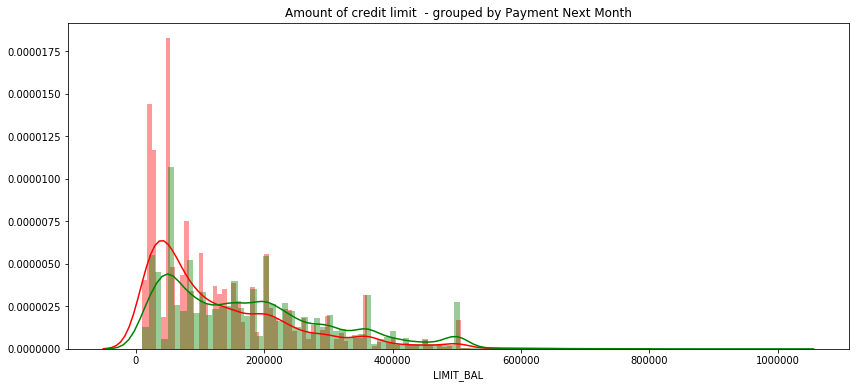

In [40]:
non_defaulter = entireDataset.loc[entireDataset['default payment next month'] == 0]["LIMIT_BAL"]
defaulter = entireDataset.loc[entireDataset['default payment next month'] == 1]["LIMIT_BAL"]

plt.figure(figsize = (14,6))
plt.title('Amount of credit limit  - grouped by Payment Next Month')
#sns.set_color_codes("dark")
sns.distplot(defaulter,kde=True,bins=100, color="red")
sns.distplot(non_defaulter,kde=True,bins=100, color="green")
plt.show()

### Observations:
#### 1. Most of the defaults are for credit limit between 0 - 100000
#### 2. In the interval of 0-100000, defaults count is greater than non defaults
#### 3. Most of the defaults number are for the amounts of 50,000, 20,000 and 30,000.

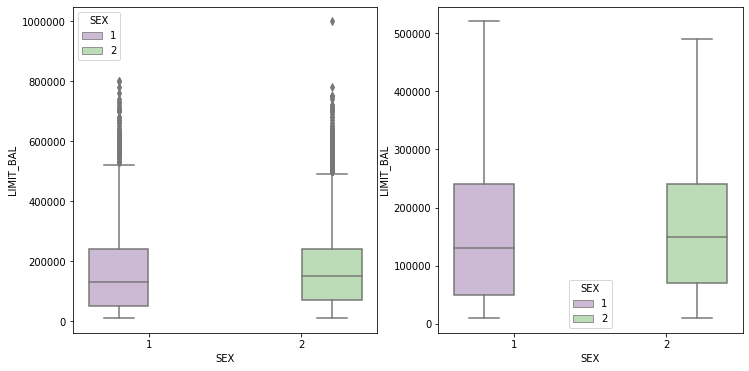

In [42]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=entireDataset, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=entireDataset, palette="PRGn", showfliers=False)
plt.show()

#### Observation:
The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4. The female have a larger outlier max value.

## Feature Correlation:

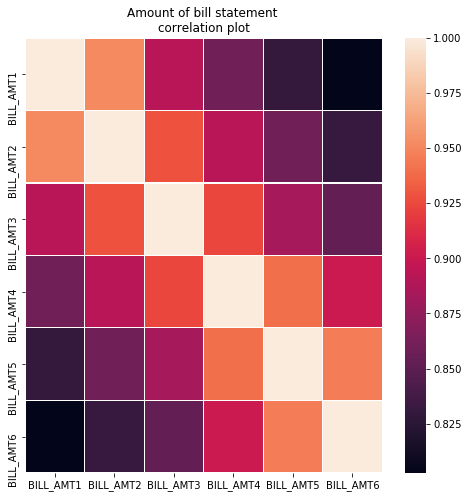

In [45]:
# Let's check the correlation of BILL_AMT
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement \ncorrelation plot')
corr = entireDataset[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1)
plt.show()

### Observation
Correlation is decreasing with distance between months.

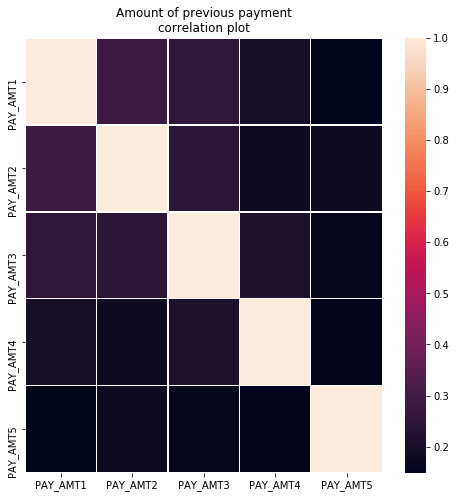

In [46]:
# Let's check the correlation of Amount of previous payment
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment\ncorrelation plot')
corr = entireDataset[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1)
plt.show()

#### Observation
There are no correlations between amounts of previous payments

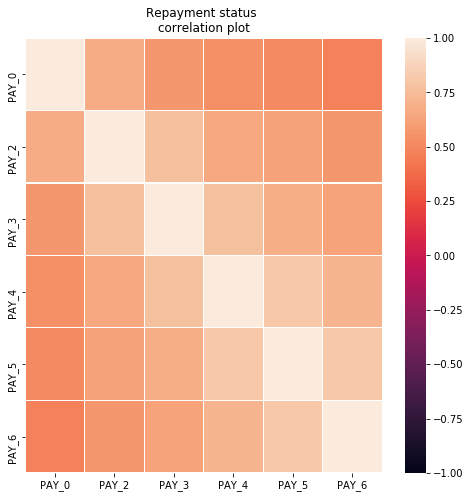

In [47]:
# Let's check the correlation between Repayment status 
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status \ncorrelation plot')
corr = entireDataset[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

#### Observation
Correlation is decreasing with distance between months

## Predict Models

In [57]:
target = 'default payment next month'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#### Split data to train and test data
Let's define train and test sets.

In [58]:
train_df, test_df = train_test_split(entireDataset, test_size=0.2, shuffle=True )

In [59]:
train_df

,CID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
24355,24356,210000,1,1,2,33,-1,-1,-1,-1,...,396,1911,396,396,396,396,1911,396,396,0
26261,26262,30000,2,1,1,34,-2,-2,-2,-2,...,5000,2100,1970,5000,5235,5000,2100,1970,2000,0
2491,2492,300000,1,1,2,31,-1,-1,-1,-1,...,360,980,360,360,360,360,980,360,3420,1
21791,21792,60000,2,4,2,27,0,0,0,0,...,190202,209923,55491,5143,5162,10202,19923,1591,5500,0
22988,22989,500000,2,1,2,42,0,0,0,0,...,159518,186563,168083,20000,50000,10000,50000,20000,50000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20451,20452,90000,1,2,2,25,0,0,-1,-1,...,2422,1051,1051,1800,1052,2422,0,1051,83573,0
1720,1721,250000,2,1,2,36,0,0,0,0,...,141367,133174,136481,5000,5000,5847,5000,5000,5018,0
11614,11615,180000,2,2,3,52,-2,-2,-2,-2,...,0,0,0,0,145,0,0,0,0,0
24137,24138,150000,1,0,2,28,0,0,0,0,...,9864,3957,2205,18056,4065,1058,3976,2216,0,0


In [60]:
# We also make copies of the train_df and test_df for later usage.

train_df_bkp = train_df.copy()
test_df_bkp = test_df.copy()

### 1. RandomForest Classifier


In [61]:
clf = RandomForestClassifier(n_jobs=4, 
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)

In [62]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=False,
                       warm_start=False)

In [63]:
preds = clf.predict(test_df[predictors])

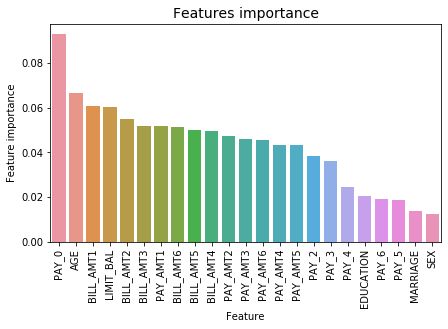

In [64]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Observation
The most important features are PAY_0, AGE, BILL_AMT1, LIMIT_BAL, BILL_AMT2, BILL_AMT3.

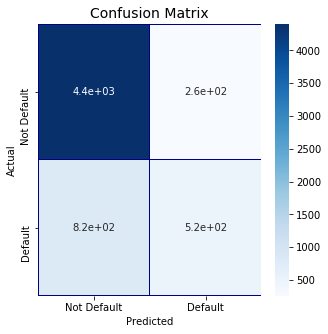

In [66]:
#Let's show a confusion matrix for the results we obtained.

cm = pd.crosstab(test_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [68]:
seedNum = 777
totCol = len(entireDataset.columns)
array = entireDataset.values
X_train = array[:,0:totCol-1]
Y_train = array[:,totCol-1]
totCol = len(testDataset.columns)
array = testDataset.values
X_validation = array[:,0:totCol-1]
Y_validation = array[:,totCol-1]
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))


X_train.shape: (30000, 24) Y_train.shape: (30000,)
X_validation.shape: (30000, 24) Y_validation.shape: (30000,)
Total time for data handling and visualization: 4:15:21.503082


In [69]:
# 4.a) Set test options and evaluation metric
# b) Test options and evaluation metric
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []


In [70]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.778767 (0.017263)
Model training time: 0:00:08.438593
CART: 0.715633 (0.034174)
Model training time: 0:00:08.212670
NB: 0.378600 (0.012167)
Model training time: 0:00:00.816119
KNN: 0.747800 (0.017531)
Model training time: 0:00:10.266709
BT: 0.801200 (0.022489)
Model training time: 0:00:50.707484
RF: 0.817967 (0.014459)
Model training time: 0:01:30.219201
ET: 0.815033 (0.015272)
Model training time: 0:00:45.770904
AB: 0.816533 (0.013639)
Model training time: 0:00:31.520965
GBM: 0.820933 (0.014817)
Model training time: 0:02:21.416206
Average metrics (accuracy) from all models: 0.7436074074074075


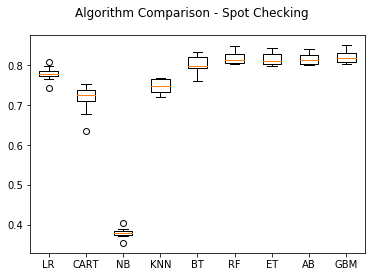

In [71]:
# c) Spot Check Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [72]:
# Set up the comparison array
results = []
names = []
# Tuning algorithm #1 - AdaBoost
startTimeModule = datetime.now()
paramGrid4 = dict(n_estimators=np.array([10,20]))
model4 = AdaBoostClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold
)
grid_result4 = grid4.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
results.append(grid_result4.cv_results_['mean_test_score'])
names.append('AB')
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.816067 using {'n_estimators': 10}
0.816067 (0.012068) with: {'n_estimators': 10}
0.815567 (0.012955) with: {'n_estimators': 20}
Model training time: 0:00:23.778722


In [73]:
# Tuning algorithm #2 - Stochastic Gradient Boosting
startTimeModule = datetime.now()
paramGrid5 = dict(n_estimators=np.array([10,20])) # try with [400,500,600,700,800]
model5 = GradientBoostingClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid5 = GridSearchCV(estimator=model5, param_grid=paramGrid5, scoring=scoring, cv=kfold
)
grid_result5 = grid5.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
results.append(grid_result5.cv_results_['mean_test_score'])
names.append('GBM')
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.821700 using {'n_estimators': 20}
0.819700 (0.013256) with: {'n_estimators': 10}
0.821700 (0.014337) with: {'n_estimators': 20}
Model training time: 0:00:44.388981


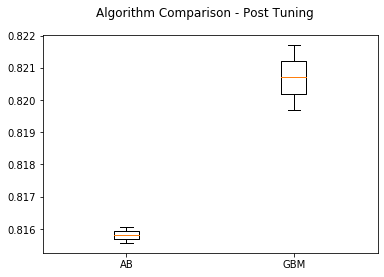

In [74]:
# 5. Compare Algorithms After Tuning
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### 7. Application of Finalize Model on Validation Dataset with Best Parameters

In [75]:
# Predictions on validation dataset
model = GradientBoostingClassifier(n_estimators=40, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8239666666666666
[[22306  1058]
 [ 4223  2413]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     23364
           1       0.70      0.36      0.48      6636

    accuracy                           0.82     30000
   macro avg       0.77      0.66      0.69     30000
weighted avg       0.81      0.82      0.80     30000



In [76]:
# Create standalone model on entire training dataset
startTimeModule = datetime.now()
finalModel = GradientBoostingClassifier(n_estimators=800, random_state=seedNum)
finalModel.fit(X_train, Y_train)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:01:53.182674
